In [1]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../classification/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("data_preprocessing", "../../classification/data_preprocessing.py")
data_preprocessing = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../classification/model_evaluator.py")
model_evaluator = loader.load_module()

import numpy as np
import pandas as pd
#from data_preprocessing import KMeansDimensionalityReduction
from sklearn.ensemble import RandomForestClassifier
#import model_evaluator
#from model_evaluator import metrics_function
#import data_import
import sklearn.metrics as metrics

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

In [4]:
df_ben = df_tot[df_tot['malware'] == False]
df_mal = df_tot[df_tot['malware'] == True]

ben = np.array(df_ben.sum())
mal = np.array(df_mal.sum())

#print(ben)
#print(mal)

diff = np.abs(ben - mal)
summ = np.abs(ben + mal)
#print(summ)
#print(summ)

rate = np.array(diff / summ)
#print(rate)

df_rate_uns = pd.Series(rate, index=list(df_tot.columns)).drop("malware")
#print(df_rate_uns)
df_rate = df_rate_uns.sort_values(ascending=False)
df_rate_rev = df_rate_uns.sort_values()
print(df_rate)

/Colors          1.000000
/RichMedia       1.000000
/XFA             0.988604
/ObjStm          0.971428
/JBIG2Decode     0.969095
/OpenAction      0.848678
/AA              0.830323
/JavaScript      0.773956
endstream        0.768453
stream           0.767761
/JS              0.758707
endobj           0.742549
obj              0.741606
/Page            0.594955
/Encrypt         0.480315
/AcroForm        0.357867
startxref        0.288893
xref             0.188899
/EmbeddedFile    0.160116
trailer          0.133669
/Launch          0.108434
dtype: float64


## Testing weights of features

In [5]:
f1=[]
fn=[]
acc=[]
for i in range(1, 22):
    columns = list(df_rate[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = RandomForestClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    
    f1.append(sum(kfold_scores_npv['test_f1_score'])/5)
    fn.append(1-sum(kfold_scores_npv['test_false_neg'])/5)
    acc.append(sum(kfold_scores_npv['test_accuracy_score'])/5)
    
    '''
    print("i = " + str(i))
    if i == 20:
        print(columns)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

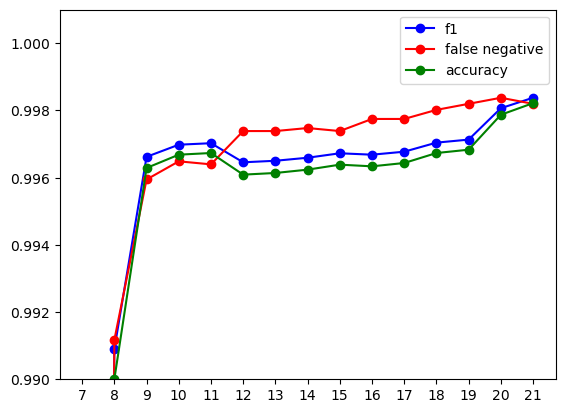

In [6]:
x = np.arange(7, 22, 1)

# plot
fig, ax = plt.subplots()
plt.ylim(0.990, 1.001)

ax.set_xticks(x)

ax.plot(x, f1[6:], '-ob', label='f1')
ax.plot(x, fn[6:], '-or', label='false negative')
ax.plot(x, acc[6:], '-og', label='accuracy')

ax.legend()

plt.show()

Da battere i = 20: 0.9980 3.6 0.9978

In [7]:
df_tot[list(df_rate[:20].index)].head()

,/Colors,/RichMedia,/XFA,/ObjStm,/JBIG2Decode,/OpenAction,/AA,/JavaScript,endstream,stream,/JS,endobj,obj,/Page,/Encrypt,/AcroForm,startxref,xref,/EmbeddedFile,trailer
0,0,0,0,9,0,0,0,0,160,160,0,217,217,7,0,0,2,2,0,2
1,0,0,0,0,0,0,115,1,143,143,1,351,351,2,0,2,3,3,0,3
2,0,0,0,0,0,0,0,0,23,23,0,168,168,4,0,0,2,2,0,2
3,0,0,0,1,0,0,0,0,15,15,0,40,40,4,0,0,2,2,0,2
4,0,0,0,0,0,0,0,0,14,14,0,42,42,2,0,0,2,2,0,2


In [8]:
for i in range(1, 22):
    columns = list(df_rate_uns[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = RandomForestClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    '''
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

In [9]:
for i in range(1, 22):
    columns = list(df_rate_rev[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = RandomForestClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    '''
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

## Testing KFold

In [10]:
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')
KMDimRed = KMeansDimensionalityReduction(df_tot)
df_tot_km, X_tot_km, X_train_km = KMDimRed.fit_ben_mal_kmeans(df_tot, X_tot, X_train)
X_test_km = KMDimRed.transform_ben_mal_kmeans(X_test)

In [11]:
# kernel to be set linear as it is binary class
classifier = RandomForestClassifier(random_state=0)

# traininf the model
#classifier.fit(X_train, y_train)
kfold_scores_npv = model_evaluator.kfold_cross_validation(classifier, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9981971506973581
0.0022522522522522522


In [12]:
# kernel to be set linear as it is binary class
classifier = RandomForestClassifier(random_state=0)

# traininf the model
#classifier.fit(X_train, y_train)
kfold_scores_npv = model_evaluator.kfold_cross_validation(classifier, X_train_km, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9971816371051355
0.0037162162162162156


NO Kfold is better

## Testing random_state

In [13]:
clf = RandomForestClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9981971506973581
0.0022522522522522522


In [14]:
clf = RandomForestClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9981405738734441
0.0023648648648648646


With random_state=0 is better

## Testing number of trees

In [15]:
for i in range(50,550,50):
    clf = RandomForestClassifier(n_estimators=i)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("# of trees " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

# of trees 50
0.9979715762094047
0.00259009009009009
0.9977731958289601
-----------------
# of trees 100
0.9981408599878108
0.0022522522522522522
0.9979587819718614
-----------------
# of trees 150
0.9980276442128663
0.00259009009009009
0.9978350578765938
-----------------
# of trees 200
0.9980841886075446
0.002364864864864865
0.9978969199242276
-----------------
# of trees 250
0.9981406378096688
0.002364864864864865
0.9979587819718614
-----------------
# of trees 300
0.9981406378096688
0.002364864864864865
0.9979587819718614
-----------------
# of trees 350
0.9981967060277089
0.002364864864864865
0.9980206440194952
-----------------
# of trees 400
0.9982532504222814
0.0022522522522522522
0.998082506067129
-----------------
# of trees 450
0.9981403521520082
0.0024774774774774778
0.9979587819718614
-----------------
# of trees 500
0.9981968965465808
0.002364864864864865
0.9980206440194952
-----------------


Best is between 100 and 200

## Testing bootstrap

In [16]:
clf = RandomForestClassifier(bootstrap = False)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9980276442128663
0.00259009009009009


In [17]:
clf = RandomForestClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9980840934150962
0.0024774774774774778


bootstrap = True is better

## Testing criterion

In [18]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = RandomForestClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("criterion " + crit)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

criterion gini
0.9981971506973581
0.0022522522522522522
0.9980206248908472
-----------------
criterion entropy
0.9981971506973581
0.0022522522522522522
0.9980206248908472
-----------------
criterion log_loss
0.9981971506973581
0.0022522522522522522
0.9980206248908472
-----------------


The same

## Testing max_depth

In [19]:
f1=[]
fn=[]
acc=[]
for m in range(2,30,2):
    clf = RandomForestClassifier(random_state=0, max_depth=m)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    kfold_scores_npv = metrics_function(y_test, y_pred)
    
    f1.append(kfold_scores_npv['f1_score'])
    fn.append(1-kfold_scores_npv['false_neg'])
    acc.append(kfold_scores_npv['accuracy_score'])
    '''
    print("max_depth " + str(m))
    print(kfold_scores_npv['f1_score'])
    print(kfold_scores_npv['false_neg'])
    print(kfold_scores_npv['accuracy_score'])
    print("-----------------")
    '''

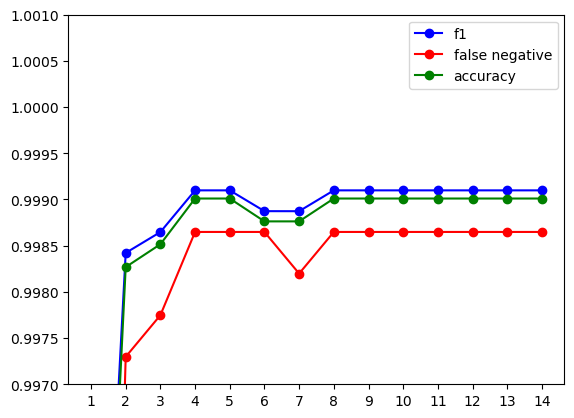

In [20]:
x = np.arange(1, 15, 1)

# plot
fig, ax = plt.subplots()
plt.ylim(0.997, 1.001)

ax.set_xticks(x)

ax.plot(x, f1[0:], '-ob', label='f1')
ax.plot(x, fn[0:], '-or', label='false negative')
ax.plot(x, acc[0:], '-og', label='accuracy')

ax.legend()

plt.show()

max depth the more is big the better

## Final conclusion

In [38]:
columns = list(df_rate[:20].index)
y_train_cust = np.array(df_tot["malware"])
X_train_cust = np.array(df_tot[columns])

clf = RandomForestClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)

print("Train score")
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)
print(sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = metrics_function(y_test, y_pred)
print("\nTest score")
print(kfold_scores_npv['f1_score'])
print(kfold_scores_npv['false_neg'])
print(kfold_scores_npv['accuracy_score'])

Train score
0.9980672521615483
0.0016216216216216218
0.9978720343103673

Test score
0.9990986931050023
0.0013513513513513514
0.9990103908955963
